In [76]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_mushrooms():
    return pd.read_csv("mushrooms.csv")

In [77]:
df_mush = load_mushrooms()
print(df_mush.columns)
df_mush

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [78]:
df_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


It looks like there are no unique veil-types in the data set we will make a copy of the dataframe and drop column. We also be sure that all columns have at least 2 unique values at the same time. we also separate the target variable from the data.

In [79]:
df_mush_reduced = df_mush.copy()
for col in df_mush_reduced.columns:
    if len(df_mush_reduced[col].unique())  == 1:
        df_mush_reduced = df_mush_reduced.drop(col, axis=1)

In [80]:
df_mush_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

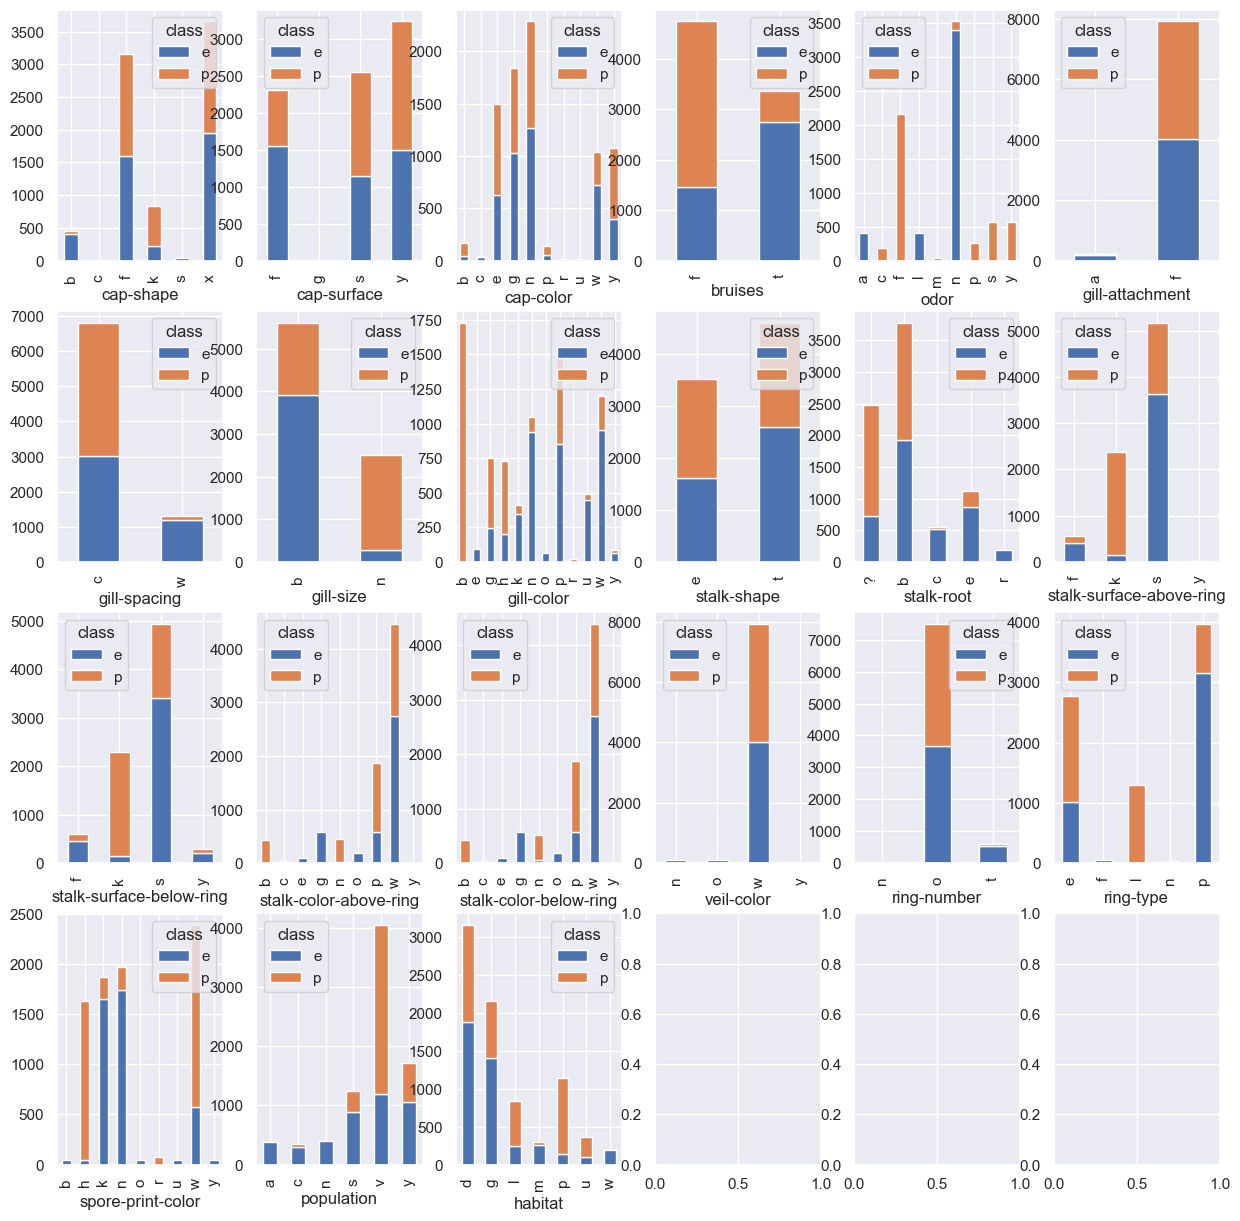

In [88]:
#FIXME get the 4x5 plots showing
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 15))

axes = axes.ravel()
for indx, category in enumerate(df_mush_reduced):
    if(indx + 1) > 21:
        break
    df_mush_reduced.groupby([df_mush_reduced.columns[indx+1], 'class']).size().unstack().fillna(0).plot(kind='bar', stacked=True, ax=axes[indx])
    

so it looks like these are all objects so we will have to encode all of these columns except class we will let sklearn deal with. now that our explo we will seperate the target, `class` in this case, from the data and do one hot encoding on each variable. we'll check relevance of these columns afterwards and adjust accordingly. For example it looks like veil color will not help distinguish between p class and e class as the w value is distributed evenly and small examples of values n and o to help point to class e.

In [ ]:

target = df_mush_reduced['class']
df_mush_reduced = df_mush_reduced.drop(['class'], axis=1)
df_mush_reduced

In [ ]:
#TODO OneHotEncode all data columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

ohe

OneHotEncoder(handle_unknown='ignore')